In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt



/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 0.005 GeV

Reconstruction efficiency with n=100.000 calculated.


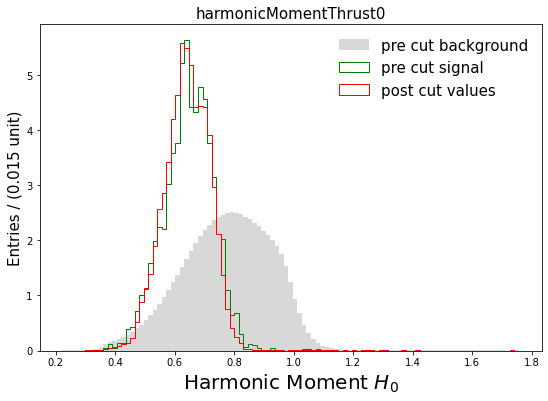

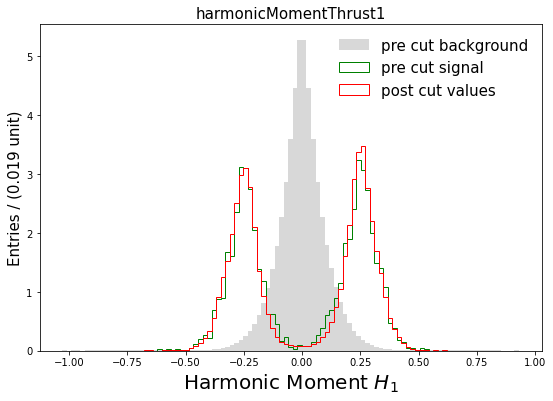

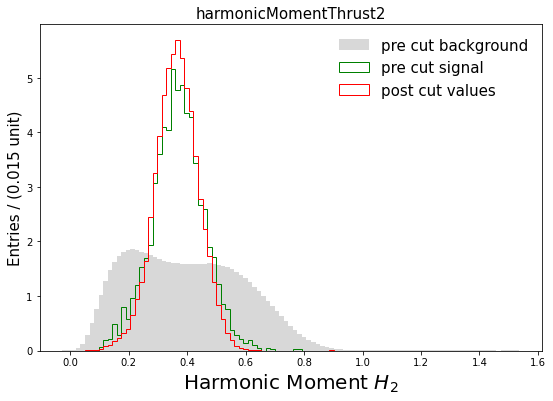

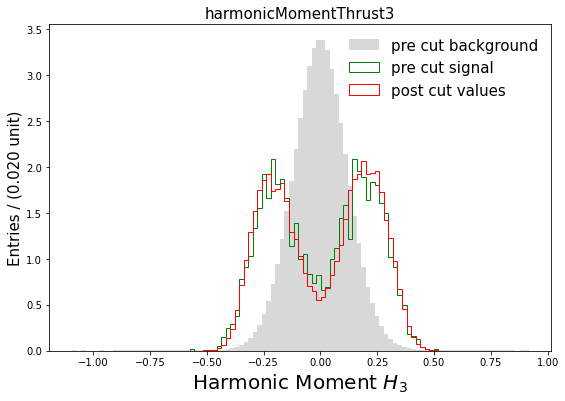

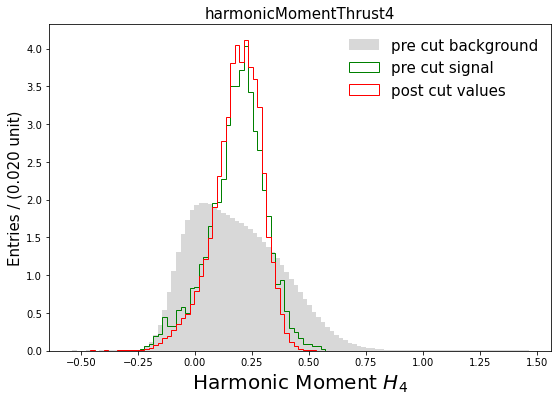

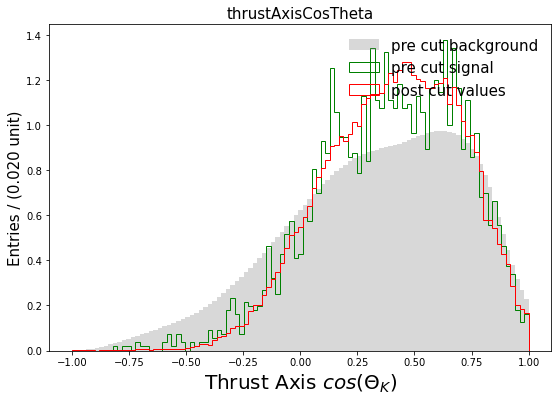

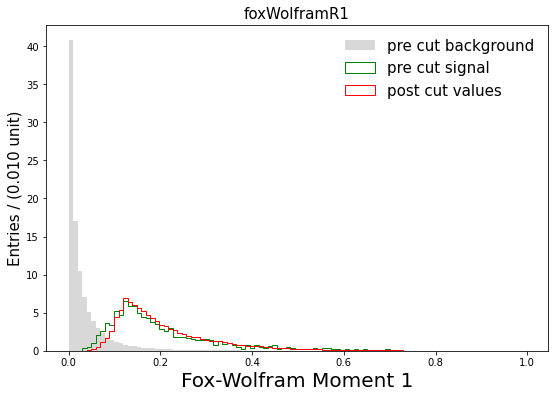

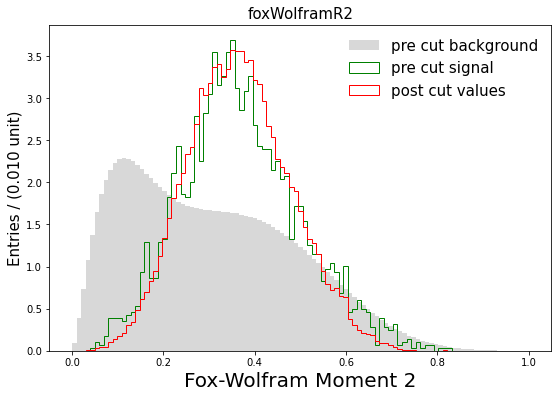

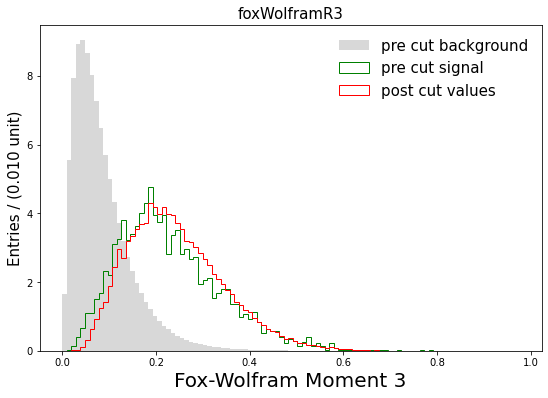

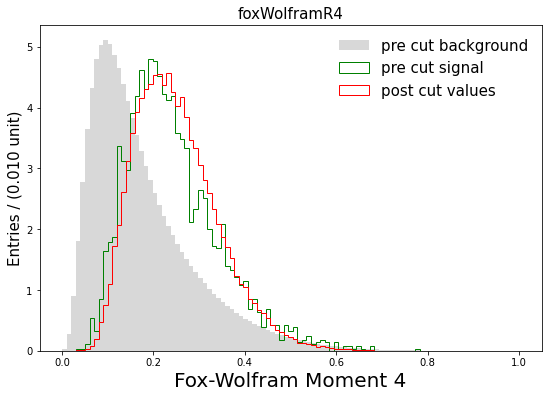

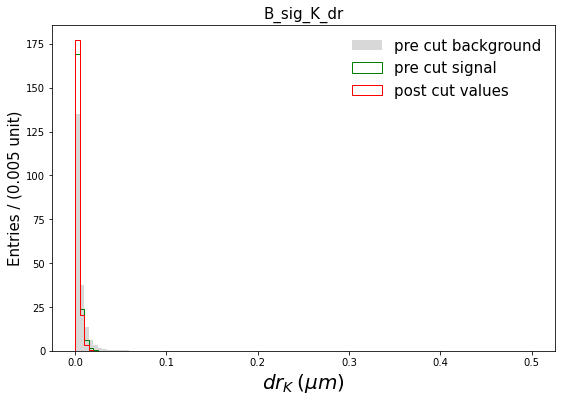

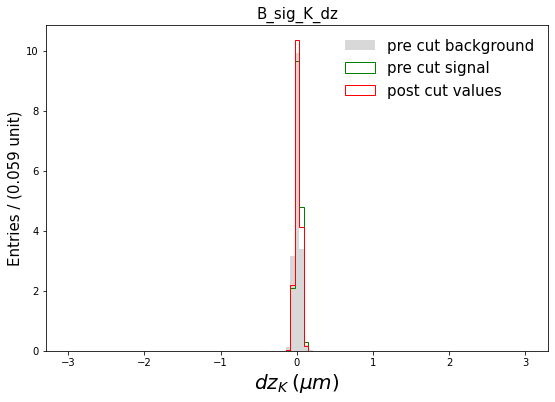

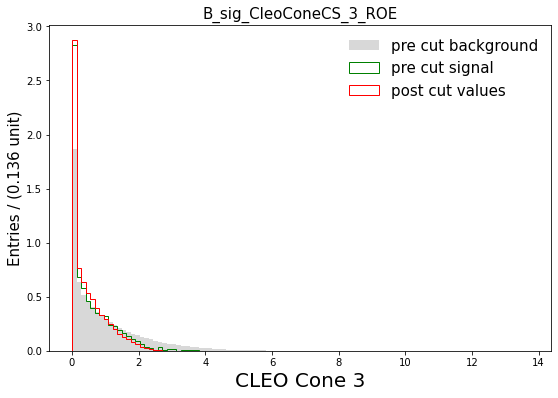

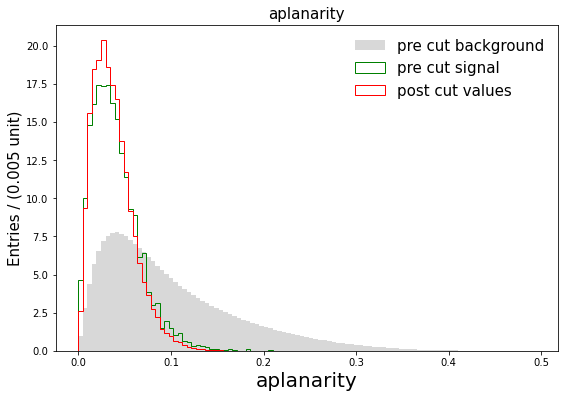

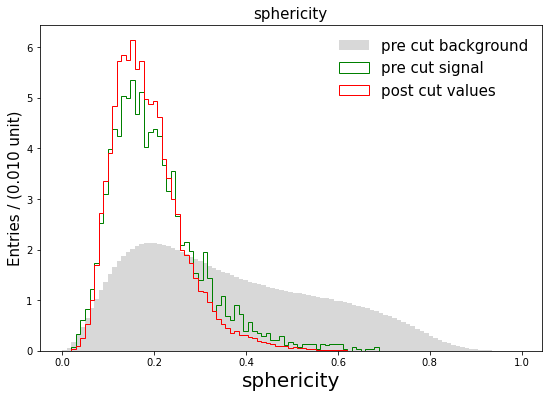

In [2]:
df = pq.read_table("/ceph/aavocone/Datasets/0_large.parquet")
df = df.to_pandas()

X = df[df.columns[:-1]]    #exclude "signal"
y = df["signal"]    

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)

clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/over0_150.txt")
yprob = clf.predict_proba(xtest)[:,1]
sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type=0)
pfom = fc.PFOM(s,b,bh,5)

max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 

pre_cut = xtest
pre_cut["prob"] = yprob
pre_cut["signal"] = ytest
signal = pre_cut[pre_cut.signal == 1]
background = pre_cut[pre_cut.signal == 0]

cut = pre_cut[pre_cut.prob >= max_index/100]

index = [   "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4","thrustAxisCosTheta",
            "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4","B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "aplanarity","sphericity"]
            
x_axis = [  "Harmonic Moment $H_0$", "Harmonic Moment $H_1$", "Harmonic Moment $H_2$", "Harmonic Moment $H_3$", "Harmonic Moment $H_4$",  "Thrust Axis $cos(\Theta_K)$",
            "Fox-Wolfram Moment 1","Fox-Wolfram Moment 2","Fox-Wolfram Moment 3","Fox-Wolfram Moment 4", "$dr_K \: (\mu m)$","$dz_K \: (\mu m)$","CLEO Cone 3","aplanarity","sphericity"]


for ii, xx in enumerate(index):
    counts0, b  = np.histogram(pre_cut[xx], bins = 101)
    plt.figure(figsize=(9,6))
    plt.hist(background[xx], density=True, histtype="stepfilled", bins=b, label="pre cut background", alpha=0.3,color="gray")
    plt.hist(signal[xx], density=True, histtype="step", bins=b, label="pre cut signal", color="g")
    plt.hist(cut[xx], density=True, histtype="step", bins=b, label="post cut values",color="r")
    plt.title(xx,fontsize=15)
    plt.ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 15)
    plt.xlabel(x_axis[ii], fontsize=20)
    plt.legend(fontsize=15,framealpha = 0)
    plt.savefig(f"/work/aavocone/week12/0/0_{xx}.pdf", format="pdf",bbox_inches="tight")
    plt.show()

## 3.0 GeV

Reconstruction efficiency with n=100.000 calculated.


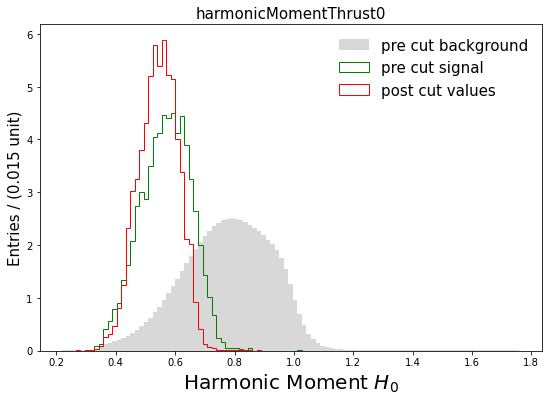

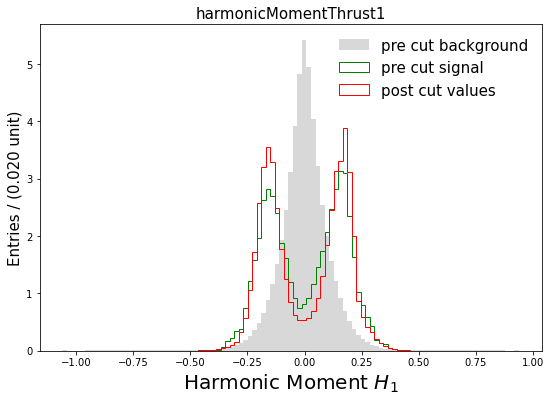

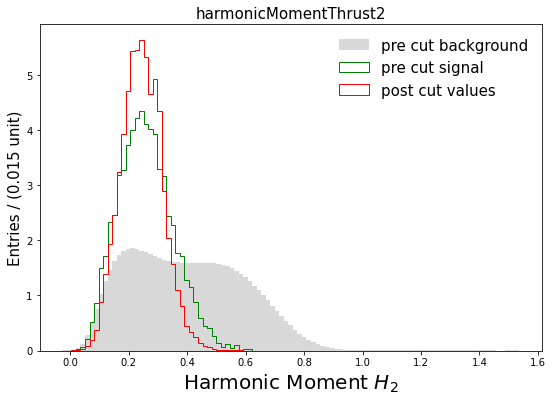

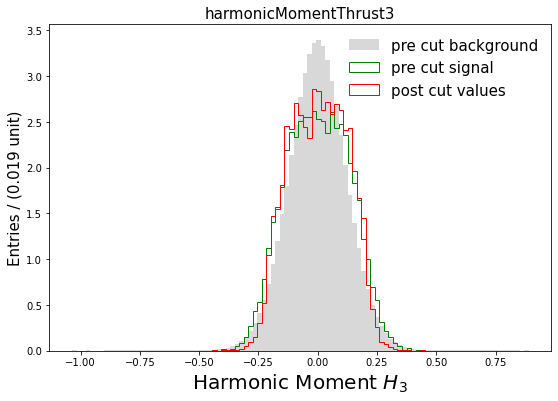

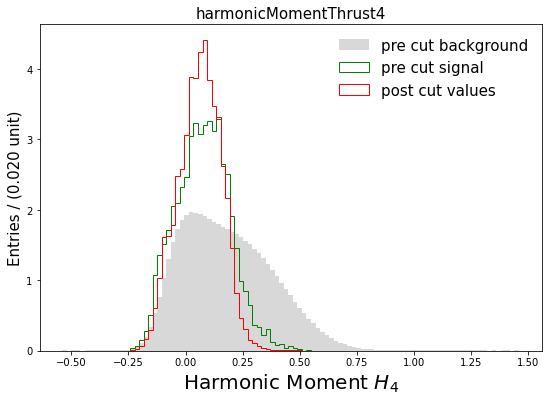

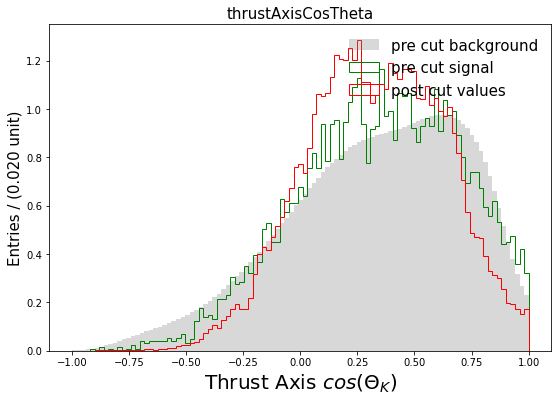

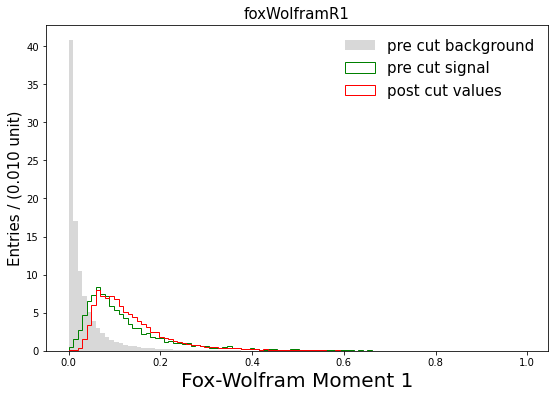

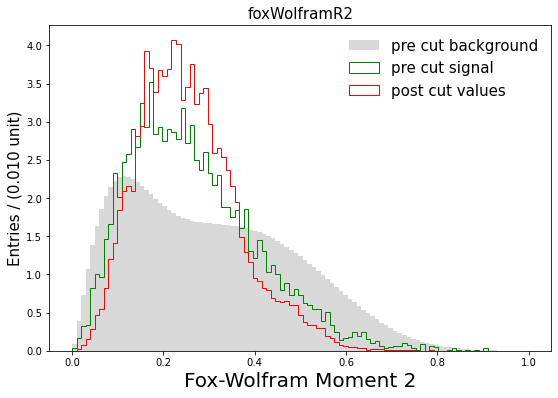

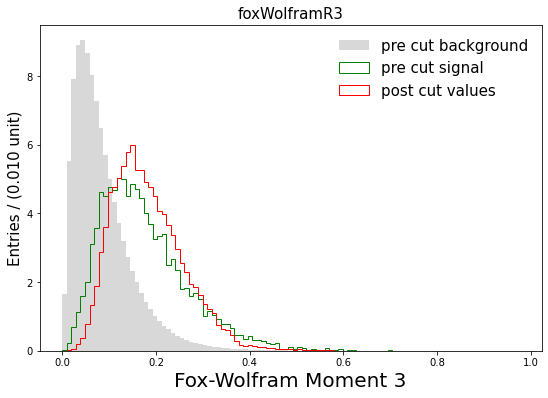

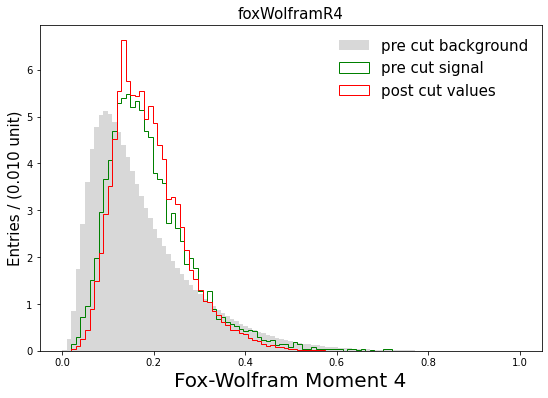

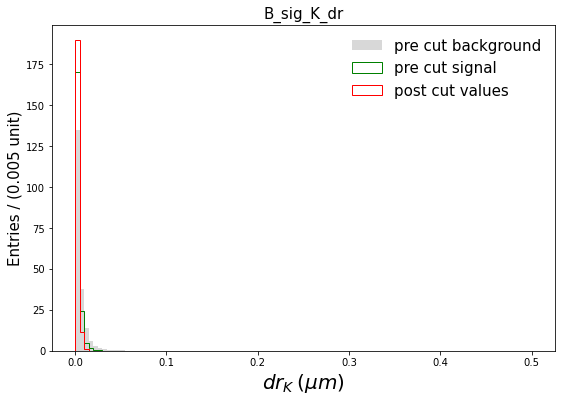

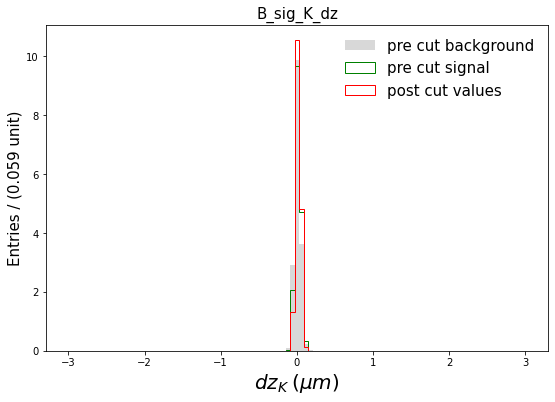

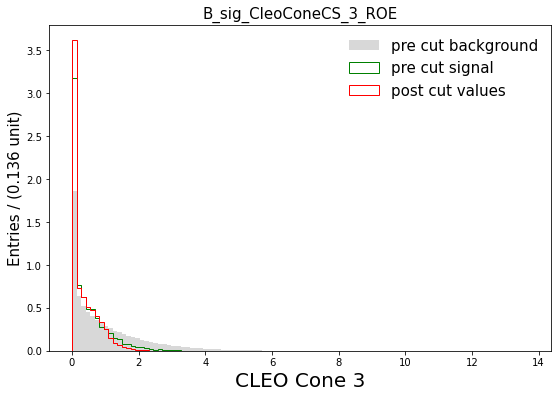

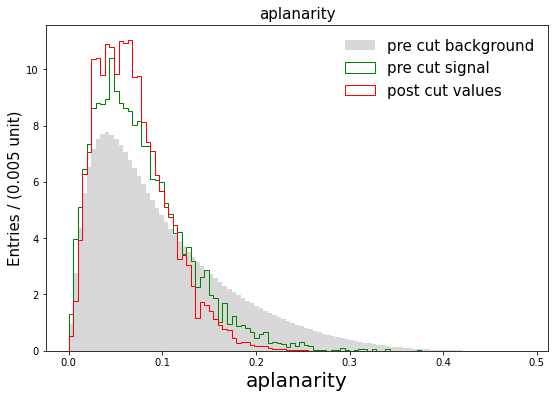

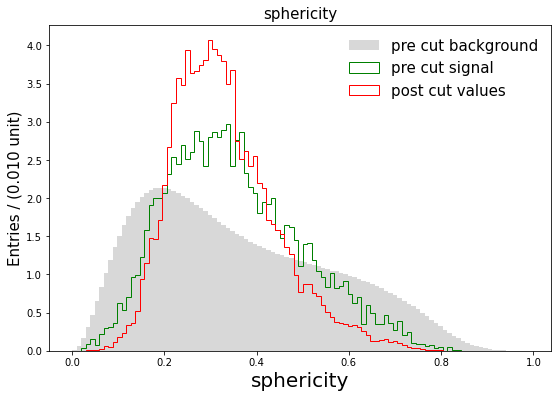

In [3]:
df = pq.read_table("/ceph/aavocone/Datasets/3_large.parquet")
df = df.to_pandas()

X = df[df.columns[:-1]]    #exclude "signal"
y = df["signal"]    

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)

clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/3_0_500.txt")
yprob = clf.predict_proba(xtest)[:,1]
sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type=0)
pfom = fc.PFOM(s,b,bh,5)

max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 

pre_cut = xtest
pre_cut["prob"] = yprob
pre_cut["signal"] = ytest
signal = pre_cut[pre_cut.signal == 1]
background = pre_cut[pre_cut.signal == 0]

cut = pre_cut[pre_cut.prob >= max_index/100]

index = [   "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4","thrustAxisCosTheta",
            "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4","B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "aplanarity","sphericity"]
            
x_axis = [  "Harmonic Moment $H_0$", "Harmonic Moment $H_1$", "Harmonic Moment $H_2$", "Harmonic Moment $H_3$", "Harmonic Moment $H_4$",  "Thrust Axis $cos(\Theta_K)$",
            "Fox-Wolfram Moment 1","Fox-Wolfram Moment 2","Fox-Wolfram Moment 3","Fox-Wolfram Moment 4", "$dr_K \: (\mu m)$","$dz_K \: (\mu m)$","CLEO Cone 3","aplanarity","sphericity"]


for ii, xx in enumerate(index):
    counts0, b  = np.histogram(pre_cut[xx], bins = 101)
    plt.figure(figsize=(9,6))
    plt.hist(background[xx], density=True, histtype="stepfilled", bins=b, label="pre cut background", alpha=0.3,color="gray")
    plt.hist(signal[xx], density=True, histtype="step", bins=b, label="pre cut signal", color="g")
    plt.hist(cut[xx], density=True, histtype="step", bins=b, label="post cut values",color="r")
    plt.title(xx,fontsize=15)
    plt.ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 15)
    plt.xlabel(x_axis[ii], fontsize=20)
    plt.legend(fontsize=15,framealpha = 0)
    plt.savefig(f"/work/aavocone/week12/3/3_{xx}.pdf", format="pdf",bbox_inches="tight")
    plt.show()




## 4.6 GeV

Reconstruction efficiency with n=100.000 calculated.


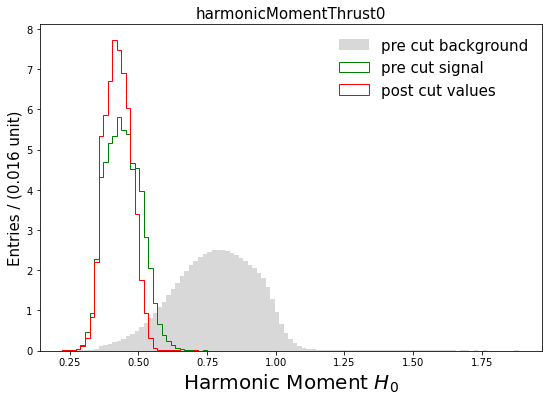

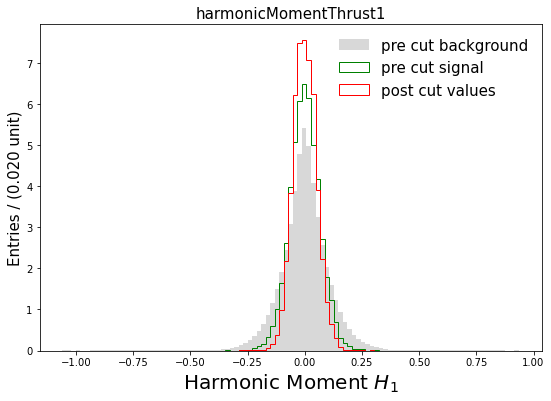

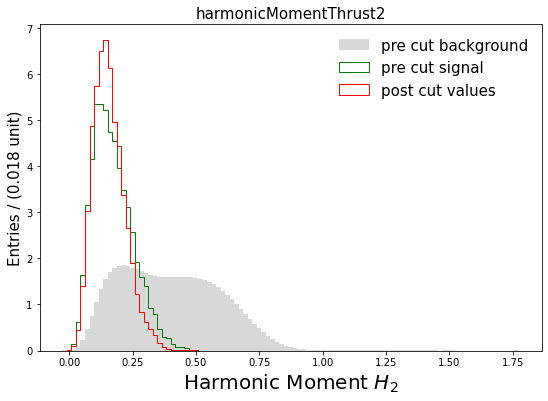

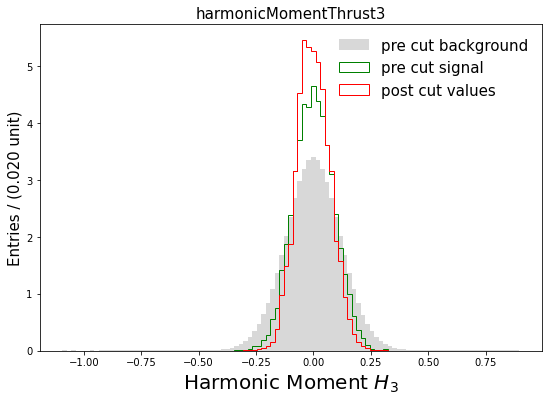

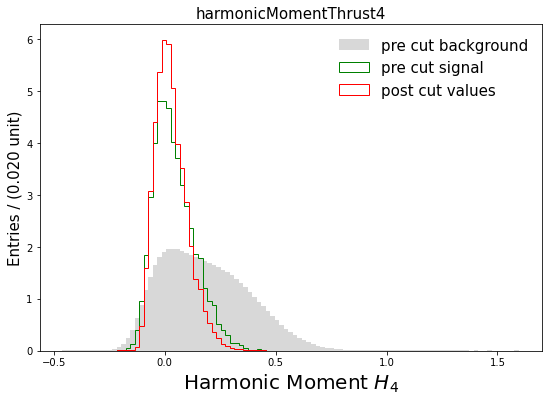

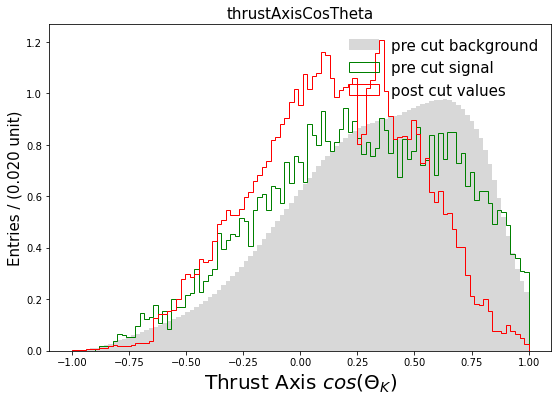

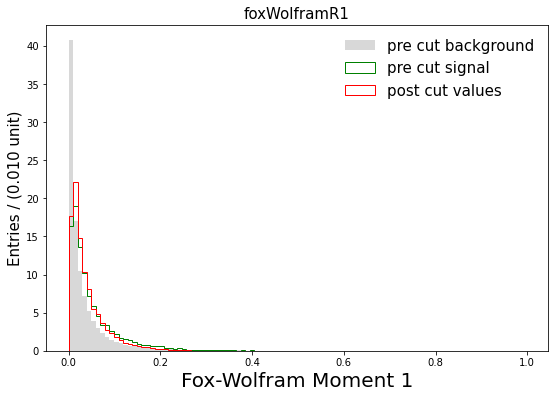

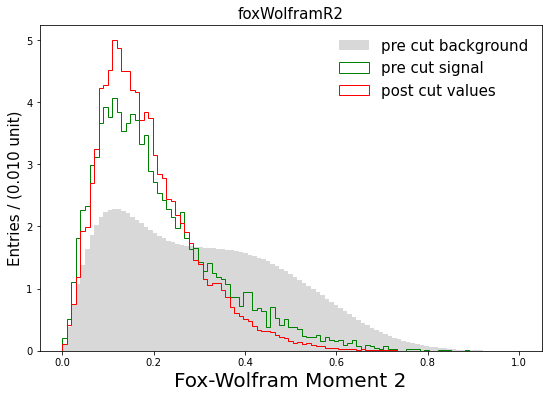

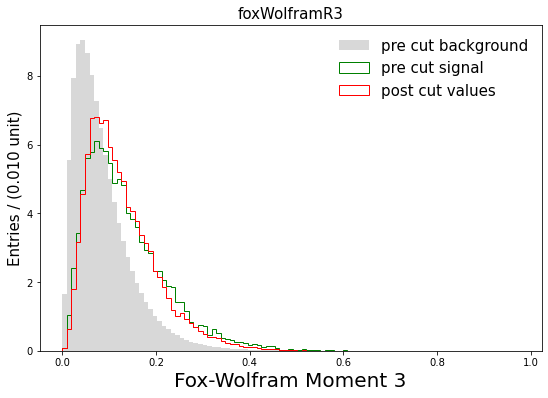

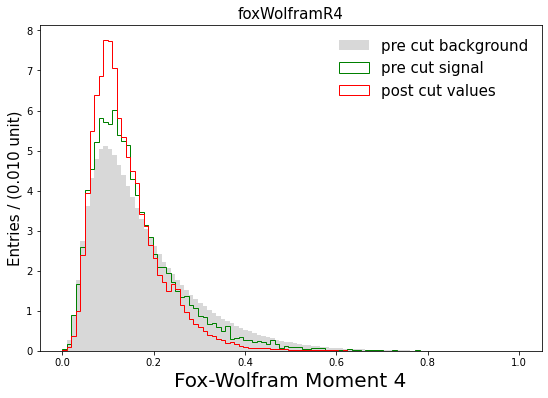

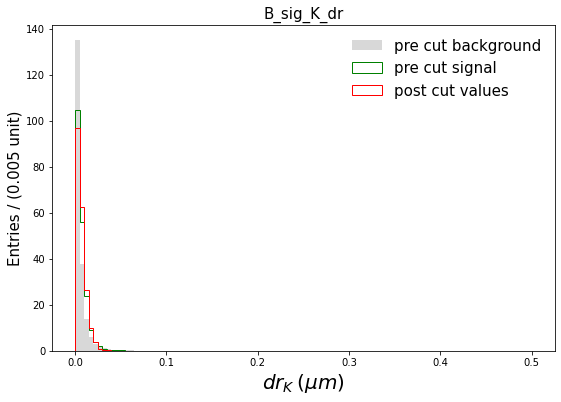

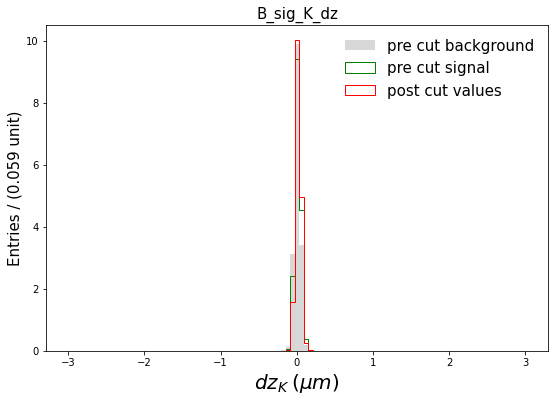

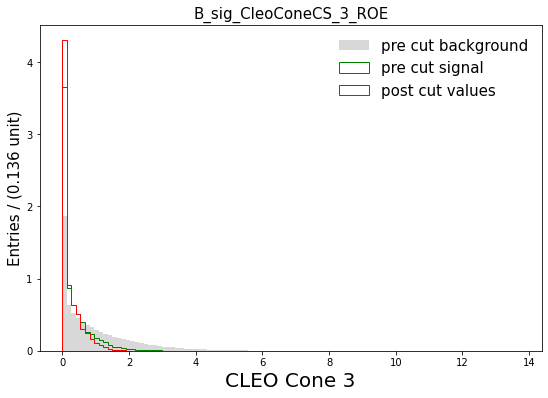

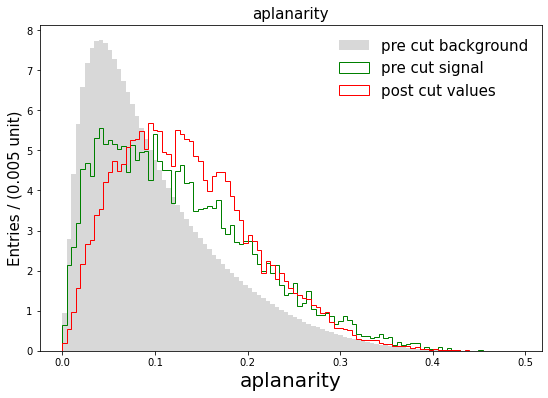

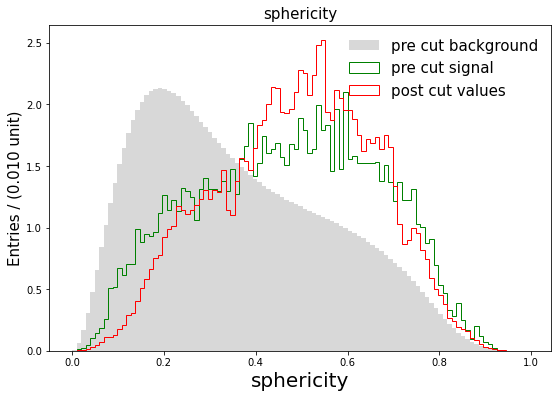

In [2]:
df = pq.read_table("/ceph/aavocone/Datasets/4_large.parquet")
df = df.to_pandas()

X = df[df.columns[:-1]]    #exclude "signal"
y = df["signal"]    

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)

clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/new_4_6_model500.txt")
yprob = clf.predict_proba(xtest)[:,1]
sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type=0)
pfom = fc.PFOM(s,b,bh,5)

max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 

pre_cut = xtest
pre_cut["prob"] = yprob
pre_cut["signal"] = ytest
signal = pre_cut[pre_cut.signal == 1]
background = pre_cut[pre_cut.signal == 0]

cut = pre_cut[pre_cut.prob >= max_index/100]

index = [   "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4","thrustAxisCosTheta",
            "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4","B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "aplanarity","sphericity"]
            
x_axis = [  "Harmonic Moment $H_0$", "Harmonic Moment $H_1$", "Harmonic Moment $H_2$", "Harmonic Moment $H_3$", "Harmonic Moment $H_4$",  "Thrust Axis $cos(\Theta_K)$",
            "Fox-Wolfram Moment 1","Fox-Wolfram Moment 2","Fox-Wolfram Moment 3","Fox-Wolfram Moment 4", "$dr_K \: (\mu m)$","$dz_K \: (\mu m)$","CLEO Cone 3","aplanarity","sphericity"]


for ii, xx in enumerate(index):
    counts0, b  = np.histogram(pre_cut[xx], bins = 101)
    plt.figure(figsize=(9,6))
    plt.hist(background[xx], density=True, histtype="stepfilled", bins=b, label="pre cut background", alpha=0.3,color="gray")
    plt.hist(signal[xx], density=True, histtype="step", bins=b, label="pre cut signal", color="g")
    plt.hist(cut[xx], density=True, histtype="step", bins=b, label="post cut values",color="r")
    plt.title(xx,fontsize=15)
    plt.ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 15)
    plt.xlabel(x_axis[ii], fontsize=20)
    plt.legend(fontsize=15,framealpha = 0)
    plt.savefig(f"/work/aavocone/week12/4/4_{xx}.pdf", format="pdf",bbox_inches="tight")
    plt.show()



## model: 0.005 GeV + 4.6 GeV on all data samples

In [1]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import functions as fc
import matplotlib.pyplot as plt

/work/aavocone/anaconda3/envs/Bachelor/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Reconstruction efficiency with n=100.000 calculated.


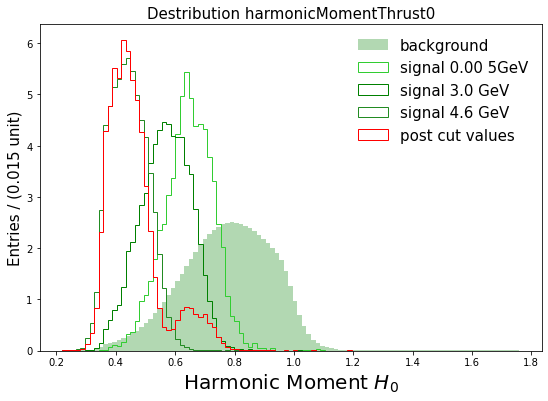

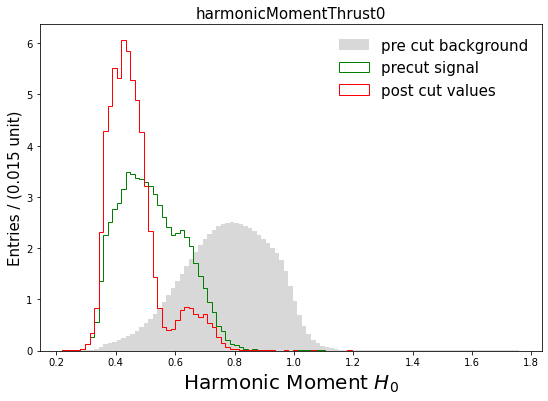

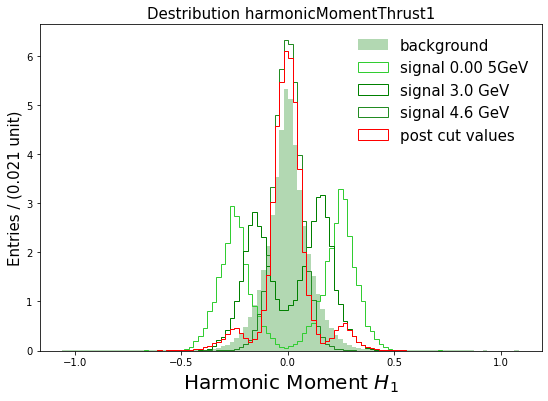

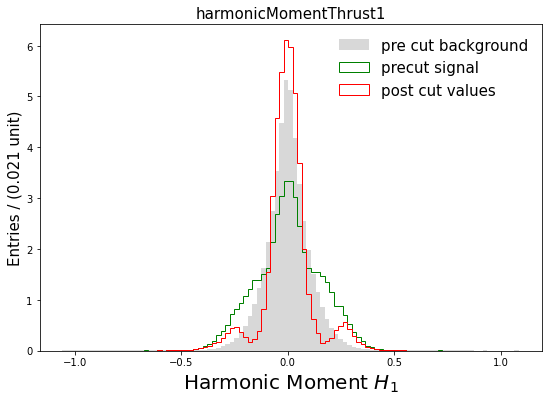

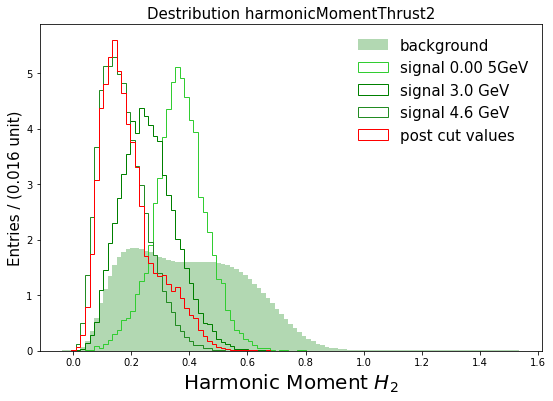

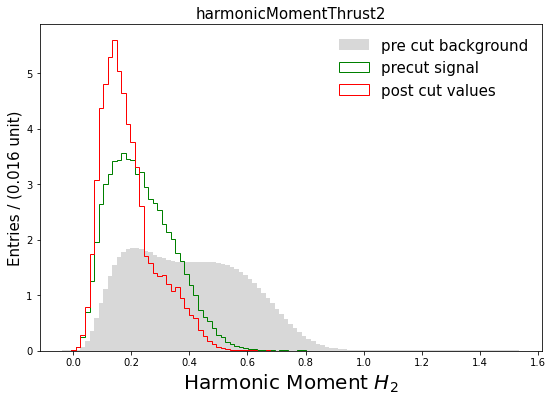

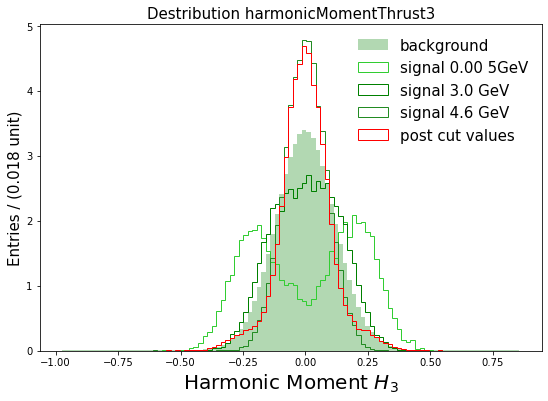

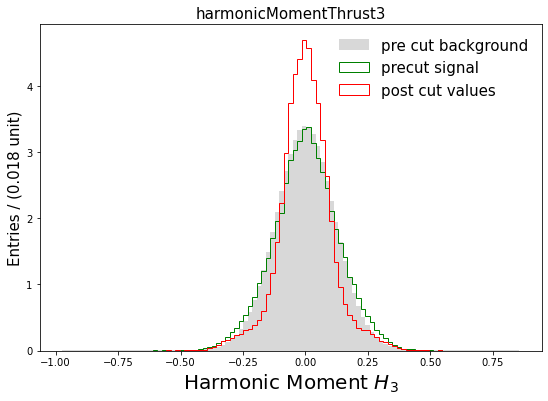

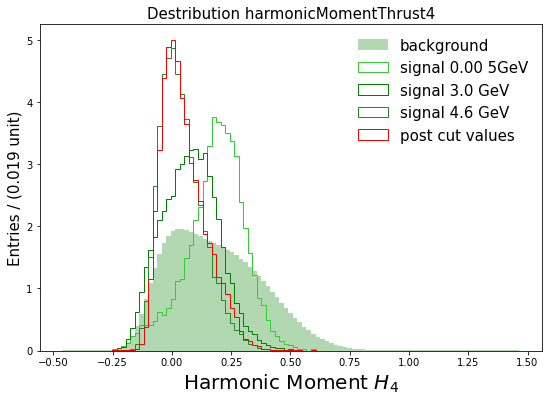

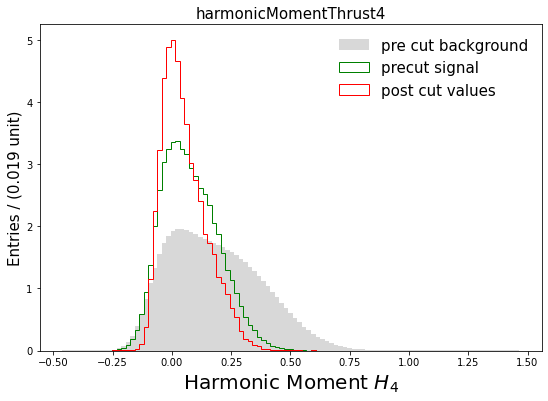

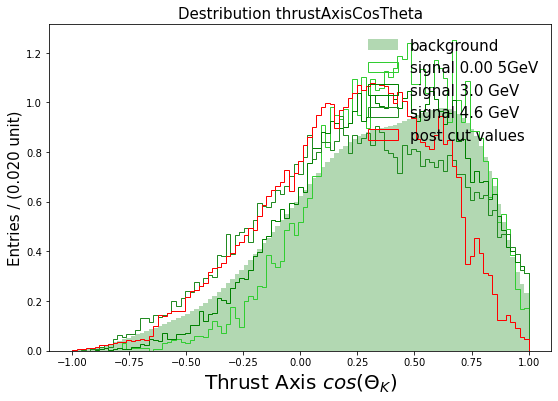

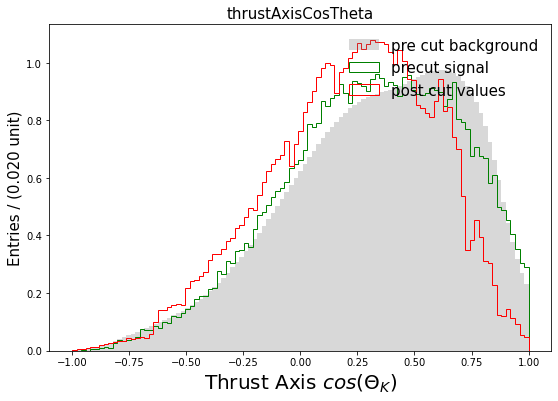

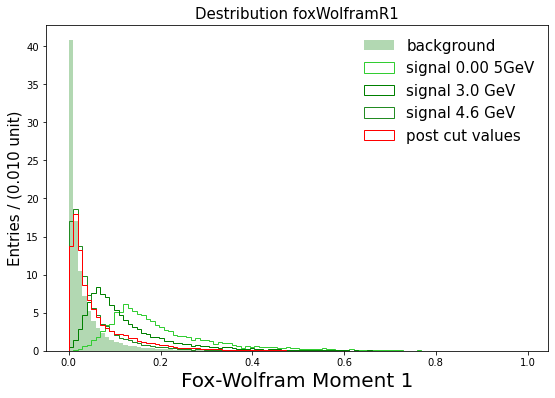

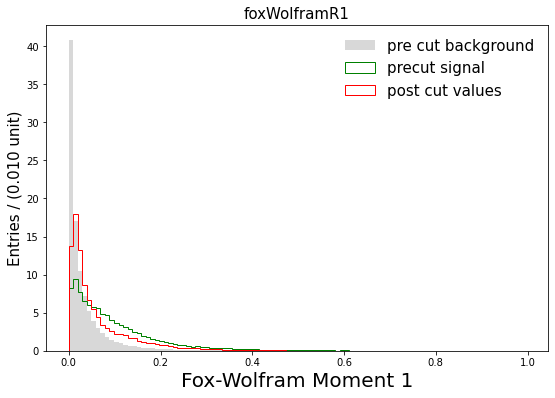

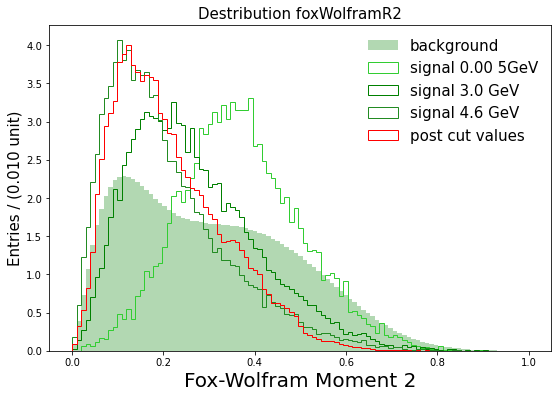

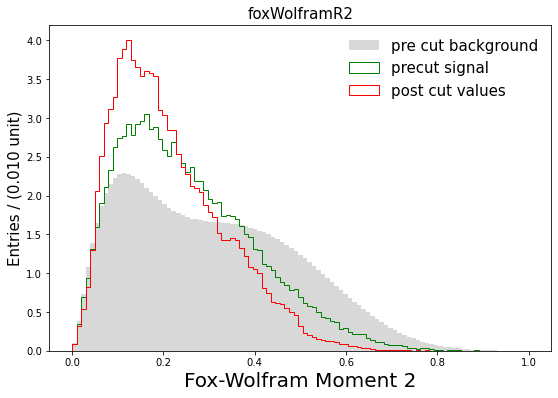

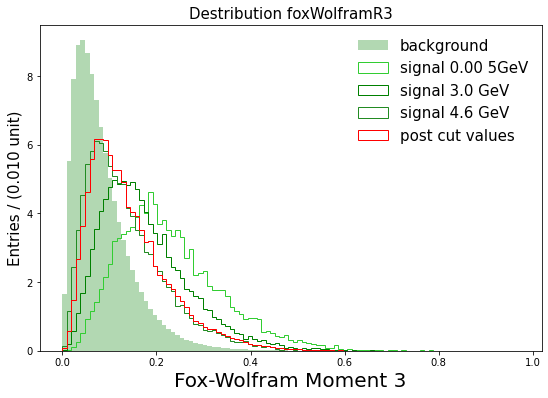

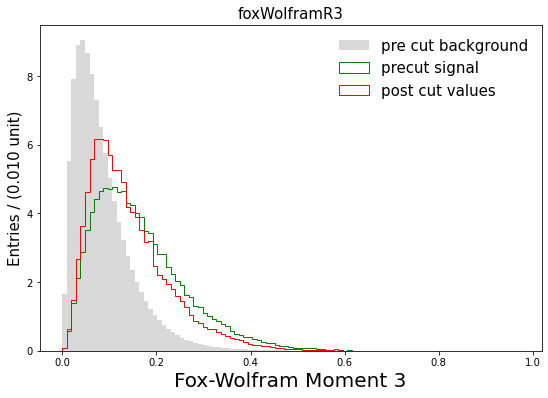

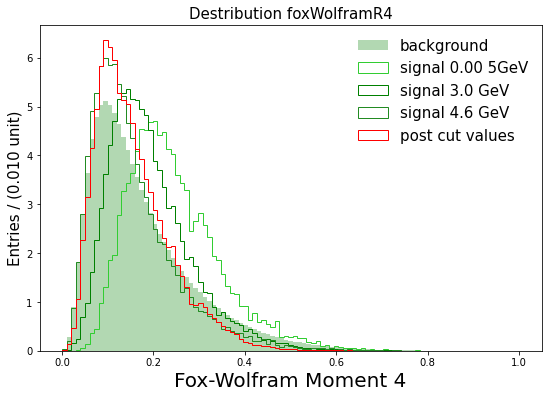

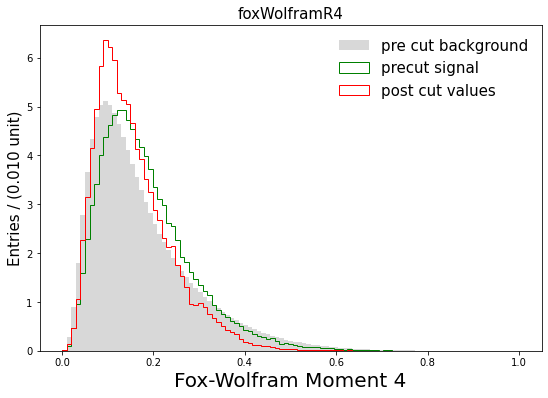

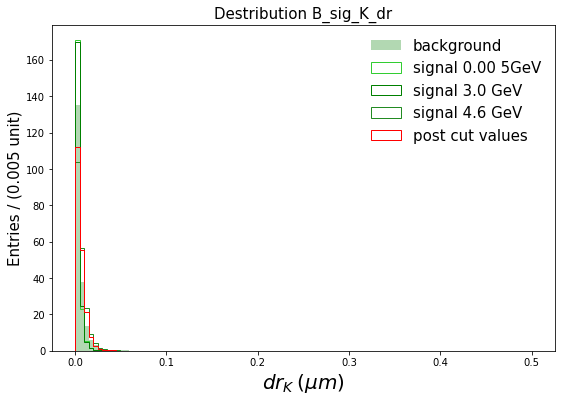

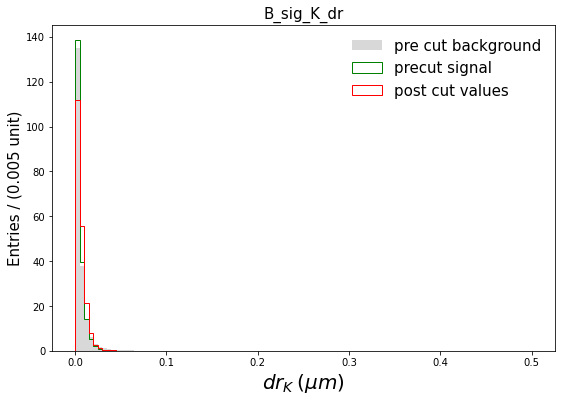

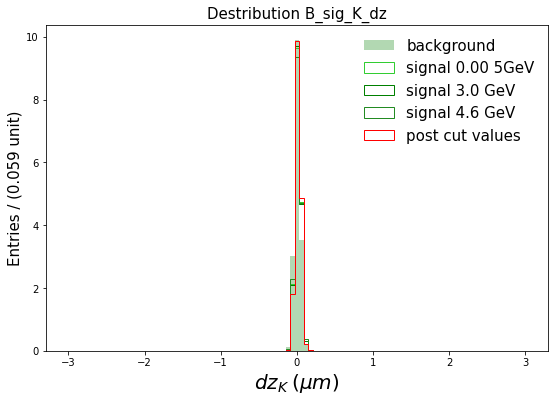

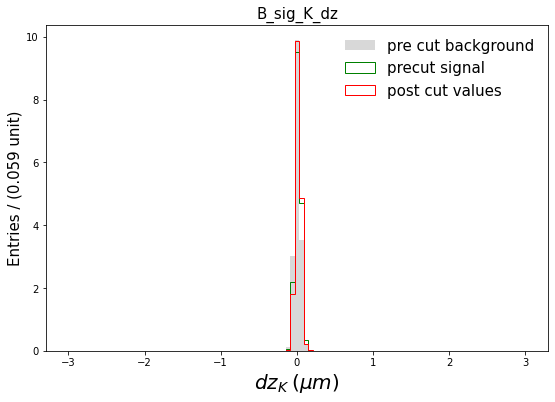

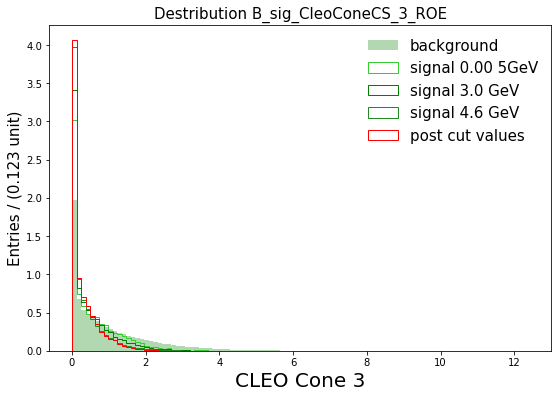

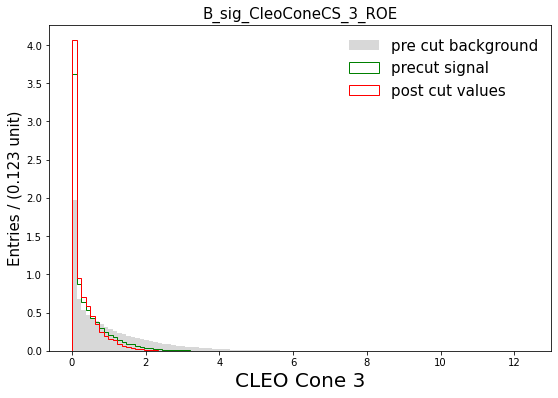

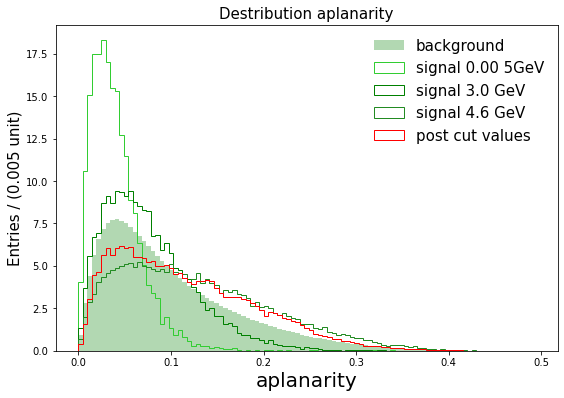

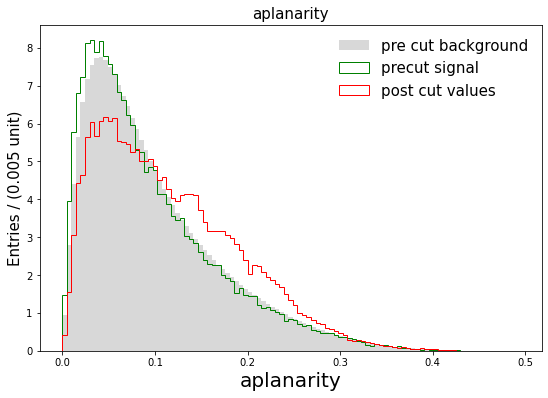

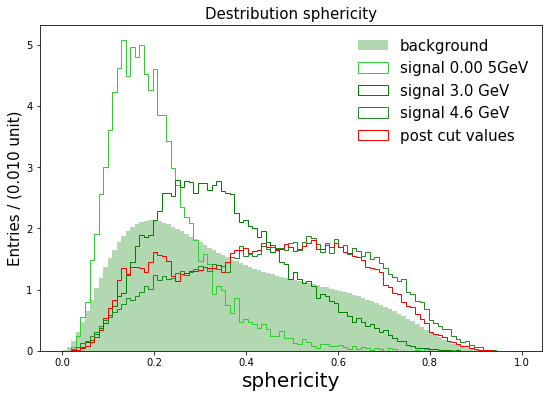

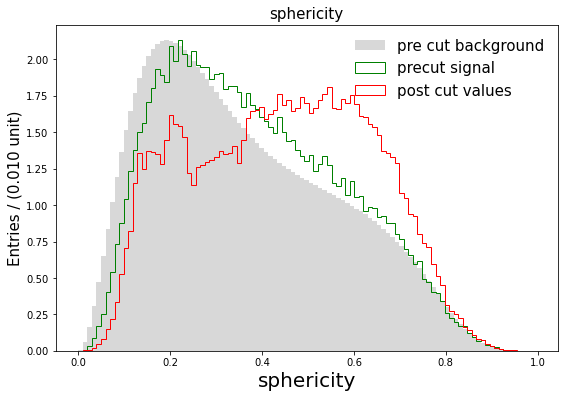

In [2]:
df = pq.read_table("/ceph/aavocone/Datasets/all_large.parquet")
df1 = pq.read_table("/ceph/aavocone/Datasets/0_large.parquet")
df2 = pq.read_table("/ceph/aavocone/Datasets/3_large.parquet")
df3 = pq.read_table("/ceph/aavocone/Datasets/4_large.parquet")

df = df.to_pandas()
df1 = df1.to_pandas()
df2 = df2.to_pandas()
df3 = df3.to_pandas()



X = df[df.columns[:-1]]    #exclude "signal"
y = df["signal"]    

xtrain,xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.33, stratify = y)
xtrain,xval,ytrain,yval = train_test_split(xtrain, ytrain, test_size = 0.5,stratify=ytrain)

clf = XGBClassifier()
clf.load_model(f"/ceph/aavocone/PFOM_models/04_model500.txt")
yprob = clf.predict_proba(xtest)[:,1]
sh,bh,s,b,bin_edges = fc.efficiency(yprob,ytest, eff_type=0)
pfom = fc.PFOM(s,b,bh,5)

max_index = np.where(pfom==max(pfom))[0][0] #np.where = tuple(array[index_value]), to get index you need to specify location in tuple and in array... 


signal = df[df.signal == 1]
background = df[df.signal == 0]


signal1 = df1[df1.signal == 1]
background1 = df1[df1.signal == 0]


signal2 = df2[df2.signal == 1]
background2= df2[df2.signal == 0]


signal3 = df3[df3.signal == 1]
background3 = df3[df3.signal == 0]


pre_cut = xtest
pre_cut["prob"] = yprob
pre_cut["signal"] = ytest
cut = pre_cut[pre_cut.prob >= max_index/100]

index = [   "harmonicMomentThrust0","harmonicMomentThrust1","harmonicMomentThrust2","harmonicMomentThrust3","harmonicMomentThrust4","thrustAxisCosTheta",
            "foxWolframR1","foxWolframR2","foxWolframR3","foxWolframR4","B_sig_K_dr","B_sig_K_dz","B_sig_CleoConeCS_3_ROE", "aplanarity","sphericity"]
            
x_axis = [  "Harmonic Moment $H_0$", "Harmonic Moment $H_1$", "Harmonic Moment $H_2$", "Harmonic Moment $H_3$", "Harmonic Moment $H_4$",  "Thrust Axis $cos(\Theta_K)$",
            "Fox-Wolfram Moment 1","Fox-Wolfram Moment 2","Fox-Wolfram Moment 3","Fox-Wolfram Moment 4", "$dr_K \: (\mu m)$","$dz_K \: (\mu m)$","CLEO Cone 3","aplanarity","sphericity"]


for ii, xx in enumerate(index):
    counts0, b  = np.histogram(pre_cut[xx], bins = 101)
    plt.figure(figsize=(9,6))
    plt.hist(df[xx], density=True, histtype="stepfilled", bins=b, label="background", alpha=0.3,color="g")
    plt.hist(signal1[xx], density=True, histtype="step", bins=b, label="signal 0.00 5GeV", color="limegreen")
    plt.hist(signal2[xx], density=True, histtype="step", bins=b, label="signal 3.0 GeV", color="g")
    plt.hist(signal3[xx], density=True, histtype="step", bins=b, label="signal 4.6 GeV", color="forestgreen")
    plt.hist(cut[xx], density=True, histtype="step", bins=b, label="post cut values",color="r")
    plt.title(f"Destribution {xx}",fontsize=15)
    plt.ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 15)
    plt.xlabel(x_axis[ii], fontsize=20)
    plt.legend(fontsize=15,framealpha = 0)
    plt.savefig(f"/work/aavocone/week12/04_on_all_{xx}.pdf", format="pdf",bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(9,6))
    plt.hist(background[xx], density=True, histtype="stepfilled", bins=b, label="pre cut background", alpha=0.3,color="gray")
    plt.hist(signal[xx], density=True, histtype="step", bins=b, label="precut signal", color="g")
    plt.hist(cut[xx], density=True, histtype="step", bins=b, label="post cut values",color="r")
    plt.title(xx,fontsize=15)
    plt.ylabel("Entries / ({:.3f} unit)".format(b[1]-b[0]), fontsize = 15)
    plt.xlabel(x_axis[ii], fontsize=20)
    plt.legend(fontsize=15,framealpha = 0)
    plt.savefig(f"/work/aavocone/week12/04_on_all_{xx}_1.pdf", format="pdf",bbox_inches="tight")
    plt.show()

